<a href="https://colab.research.google.com/github/sanskar-maddi/sanskarmaddi/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM 1

You are required to find the 10001 th and 1000001 th prime number. You can use any of the basic python libraries mentioned in this link: https://docs.python.org/3/library/, and numpy, for complemting this assignment. Use of any other libraries is strictly prohibited. Additionally you are required to report the implementation time for you code.

In [1]:
import time
# import all other necessary libraries that you require
import itertools
from math import ceil, log
import sys

In [2]:
#define a function to get the nth position prime number
def primes():
    '''Yields the sequence of prime numbers via the Sieve of Eratosthenes.'''
    D = {}
    yield 2
    # start counting at 3 and increment by 2, as all primes other than 2 are odd
    for q in itertools.count(3, 2):
        p = D.pop(q, None)
        if p is None:
            # q not a key in D, so q is prime, therefore, yield it
            yield q
            # mark q squared as not-prime (with q as first-found prime factor)
            D[q*q] = q
        else:
            # let x <- smallest (N*p)+q which wasn't yet known to be composite
            # we just learned x is composite, with p first-found prime factor,
            # since p is the first-found prime factor of q -- find and mark it
            x = p + q
            while x in D or x % 2 == 0:
                x += p
            D[x] = p

#And then finding the nth prime becomes trivial:

def nth_prime(n):
    if n < 1:
        raise ValueError("n must be >= 1 for nth_prime")
    for i, p in enumerate(primes(), 1):
        if i == n:
            return p

In [3]:
start1 = time.time()

# your code goes here
a=10001
p1=nth_prime(int(a))
end1 = time.time()

start2 = time.time()
b=1000001
p2=nth_prime(int(b))
end2 = time.time()

In [4]:
time1 = end1 - start1
time2 = end2 - start2
print(f'The 10001th prime number is {p1}')     #10001th prime number
print(f'Time taken for implentation of 10001th prime number= {time1}')
print(f'The 1000001th prime number is {p2}')   #1000001th prime number
print(f'Time taken for implentation of 1000001th prime number= {time2}')

The 10001th prime number is 104743
Time taken for implentation of 10001th prime number= 0.03754162788391113
The 1000001th prime number is 15485867
Time taken for implentation of 1000001th prime number= 6.319957256317139


# PROBLEM 2

For this problem you are required to find the center of the bounding box enclosing the circle in the image "TEST_im.jpg".
**You are only allowed to use OpenCV, numpy for this problem**

In [5]:
##import all the necesary library
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [20]:
## Read the image
img=cv2.imread("TEST_im.jpg")

Text(0.5, 1.0, 'Bounding Box for circle')

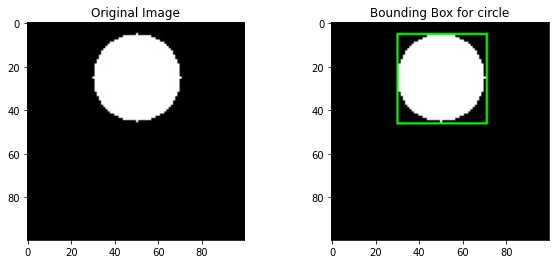

In [21]:
##Find the Bounding box 
# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
# find contours and get the external one

contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# with each contour, draw boundingRect in green
# get the bounding rect
x, y, w, h = cv2.boundingRect(contours[0])
# draw a green rectangle to visualize the bounding rect
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.imshow(cv2.imread("TEST_im.jpg"));
ax1.set_title('Original Image')
ax2.imshow(img);
ax2.set_title('Bounding Box for circle')

In [22]:
##Find the center of the bounding box

cnt = contours[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(f'Center of bounding box: x:{x+(w/2)} y:{y+(h/2)}')
print(f'Center of contour: x:{cx} y:{cy}')

Center of bounding box: x:50.5 y:25.5
Center of contour: x:50 y:25
